<a href="https://colab.research.google.com/github/fataik1/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Fatai_KingDS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
import pandas as pd

In [44]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-02-13 00:58:10--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.111.69
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.111.69|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  78.0MB/s    in 2.5s    

2020-02-13 00:58:13 (78.0 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [8]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [9]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [10]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [20]:
##### YOUR CODE HERE #####

#DataFrames Needed(Products, order_products_train, order_products_prior)
products = pd.read_csv('products.csv')
print(products.shape)
products.head()


(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [21]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [22]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [23]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [24]:
#Now Concatenate Order_prior & Order_train
order_products = pd.concat([order_products__prior, order_products__train])

print(order_products.shape)

order_products.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [13]:
#Next we need to create the condition
condition = (orders['order_id'] <=5)


orders_subset = orders[condition]
orders_subset

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
2593373,5,156122,prior,42,6,16,9.0
2958007,4,178520,prior,36,1,9,7.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0


#Look at Subset Data


In [14]:
orders['user_id'] == 1

0           True
1           True
2           True
3           True
4           True
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: user_id, Length: 3421083, dtype: bool

In [43]:
orders['order_number'] <= 2

0           True
1           True
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Name: order_number, Length: 3421083, dtype: bool

In [94]:
(orders['user_id'] == 1) & (orders['order_number'] <= 2)

0           True
1           True
2          False
3          False
4          False
           ...  
3421078    False
3421079    False
3421080    False
3421081    False
3421082    False
Length: 3421083, dtype: bool

In [25]:
condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2)

orders_subset = orders[condition]

print(orders_subset.shape)
orders_subset.head()

(2, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [16]:
orders_subset = orders[((orders['user_id'] == 1) & (orders['order_number'] <= 2))]

print(orders_subset.shape)
orders_subset.head()

(2, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [26]:
#Filter the Order_ID
order_products_subset = order_products[((order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795))]

print(order_products_subset.shape)
order_products_subset.head(11)

(11, 4)


,order_id,product_id,add_to_cart_order,reordered
22742744,2398795,196,1,1
22742745,2398795,10258,2,0
22742746,2398795,12427,3,1
22742747,2398795,13176,4,0
22742748,2398795,26088,5,1
22742749,2398795,13032,6,0
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0


In [27]:
#Merge the two dataframes
orders_and_products = pd.merge(orders_subset, order_products_subset, on='order_id', how='inner')
orders_and_products

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0
5,2398795,1,prior,2,3,7,15.0,196,1,1
6,2398795,1,prior,2,3,7,15.0,10258,2,0
7,2398795,1,prior,2,3,7,15.0,12427,3,1
8,2398795,1,prior,2,3,7,15.0,13176,4,0
9,2398795,1,prior,2,3,7,15.0,26088,5,1


In [99]:
#Remove Columns we don't need
orders_and_products = orders_and_products.drop(['eval_set',  'days_since_prior_order'], axis='columns')
orders_and_products.head(11)

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,reordered
0,2539329,1,1,2,8,196,1,0
1,2539329,1,1,2,8,14084,2,0
2,2539329,1,1,2,8,12427,3,0
3,2539329,1,1,2,8,26088,4,0
4,2539329,1,1,2,8,26405,5,0
5,2398795,1,2,3,7,196,1,1
6,2398795,1,2,3,7,10258,2,0
7,2398795,1,2,3,7,12427,3,1
8,2398795,1,2,3,7,13176,4,0
9,2398795,1,2,3,7,26088,5,1


In [0]:
#Columns Needed
order_id, user_id, order_number, order_dow, order_hour_of_day, product_id, add_to_cart_order, reordered)

In [101]:
#Missing Product Name, will merge that.
orders_and_products['product_id']

0       196
1     14084
2     12427
3     26088
4     26405
5       196
6     10258
7     12427
8     13176
9     26088
10    13032
Name: product_id, dtype: int64

In [102]:
orders_and_products['product_id'].isin([196, 26088])

0      True
1     False
2     False
3      True
4     False
5      True
6     False
7     False
8     False
9      True
10    False
Name: product_id, dtype: bool

In [103]:
condition = products['product_id'].isin(orders_and_products['product_id'])

products_subset = products[condition]

products_subset

,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
10257,10258,Pistachios,117,19
12426,12427,Original Beef Jerky,23,19
13031,13032,Cinnamon Toast Crunch,121,14
13175,13176,Bag of Organic Bananas,24,4
14083,14084,Organic Unsweetened Vanilla Almond Milk,91,16
26087,26088,Aged White Cheddar Popcorn,23,19
26404,26405,XL Pick-A-Size Paper Towel Rolls,54,17


In [104]:
final = pd.merge(orders_and_products, products_subset, on='product_id', how='inner')
final

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2539329,1,1,2,8,196,1,0,Soda,77,7
1,2398795,1,2,3,7,196,1,1,Soda,77,7
2,2539329,1,1,2,8,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16
3,2539329,1,1,2,8,12427,3,0,Original Beef Jerky,23,19
4,2398795,1,2,3,7,12427,3,1,Original Beef Jerky,23,19
5,2539329,1,1,2,8,26088,4,0,Aged White Cheddar Popcorn,23,19
6,2398795,1,2,3,7,26088,5,1,Aged White Cheddar Popcorn,23,19
7,2539329,1,1,2,8,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17
8,2398795,1,2,3,7,10258,2,0,Pistachios,117,19
9,2398795,1,2,3,7,13176,4,0,Bag of Organic Bananas,24,4


In [105]:
final = final.drop(['aisle_id', 'department_id'], axis=1)
final

,order_id,user_id,order_number,order_dow,order_hour_of_day,product_id,add_to_cart_order,reordered,product_name
0,2539329,1,1,2,8,196,1,0,Soda
1,2398795,1,2,3,7,196,1,1,Soda
2,2539329,1,1,2,8,14084,2,0,Organic Unsweetened Vanilla Almond Milk
3,2539329,1,1,2,8,12427,3,0,Original Beef Jerky
4,2398795,1,2,3,7,12427,3,1,Original Beef Jerky
5,2539329,1,1,2,8,26088,4,0,Aged White Cheddar Popcorn
6,2398795,1,2,3,7,26088,5,1,Aged White Cheddar Popcorn
7,2539329,1,1,2,8,26405,5,0,XL Pick-A-Size Paper Towel Rolls
8,2398795,1,2,3,7,10258,2,0,Pistachios
9,2398795,1,2,3,7,13176,4,0,Bag of Organic Bananas


In [0]:
product_names = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avacado','Organic Avacado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']

In [106]:
products.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [107]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [58]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [32]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


In [33]:
product_names = ['Banana', 'Bag of Organic Bananas'] 
condition = merged['product_name'].isin(product_names)

subset = merged[condition]

print(subset.shape)
subset.head()

(886221, 4)


,product_id,product_name,order_id,order_hour_of_day
7,13176,Bag of Organic Bananas,1107,11
255,13176,Bag of Organic Bananas,43669,18
420,13176,Bag of Organic Bananas,82631,10
531,13176,Bag of Organic Bananas,107716,14
547,13176,Bag of Organic Bananas,108894,15


In [40]:
product_names = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 'Organic Baby Spinach', 'Organic Hass Avacado','Organic Avacado', 'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk']
condition = merged['product_name'].isin(product_names)

subset = merged[condition]

print(subset.shape)
subset.head()

(2013213, 4)


,product_id,product_name,order_id,order_hour_of_day
7,13176,Bag of Organic Bananas,1107,11
8,16797,Strawberries,1107,11
20,16797,Strawberries,5319,14
47,16797,Strawberries,9273,15
51,21903,Organic Baby Spinach,9273,15


In [39]:

red = subset[subset['product_name']=='Organic Strawberries']
green = subset[subset['product_name']=='Organic Baby Spinach']
navy = subset[subset['product_name']=='Organic Avocado']
neon = subset[subset['product_name']=='Large Lemon']
mix = subset[subset['product_name']=='Strawberries']
sour = subset[subset['product_name']=='Limes']
white = subset[subset['product_name']=='Organic Whole Milk']              

SyntaxError: ignored

In [0]:
yellow = subset[subset['product_name']=='Banana']
few = subset[subset['product_name']=='Bag of Organic Bananas']

In [239]:
#List as single columns
yellow['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.005933
1     0.002986
2     0.001765
3     0.001246
4     0.001451
5     0.002785
6     0.010061
7     0.030654
8     0.057898
9     0.080099
10    0.085965
11    0.081278
12    0.076663
13    0.078253
14    0.080972
15    0.080808
16    0.078060
17    0.065173
18    0.052340
19    0.039946
20    0.030739
21    0.024741
22    0.018812
23    0.011372
Name: order_hour_of_day, dtype: float64

In [240]:
few['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.007184
1     0.003661
2     0.002127
3     0.001519
4     0.001590
5     0.002702
6     0.009414
7     0.030879
8     0.058150
9     0.079429
10    0.083719
11    0.081298
12    0.077530
13    0.079796
14    0.081306
15    0.081668
16    0.077247
17    0.062963
18    0.049690
19    0.039065
20    0.030603
21    0.025159
22    0.020393
23    0.012909
Name: order_hour_of_day, dtype: float64

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [241]:
import pandas as pd
import numpy as np

table2 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table1 = table2.T

table1

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [242]:
# table2 -> tidy
table2 = table2.reset_index()
table2

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [243]:
# Find the data that I want to be in my single "tidy" column
tidy2 = table2.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
tidy2

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [244]:
#renaming the columns
tidy2 = tidy2.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
tidy2

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [245]:
tidy2.trt = tidy2.trt.str.replace('treatment', '')

tidy2

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [246]:
# tidy -> table2
wide = tidy2.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [247]:
 tidy2.pivot_table

<bound method DataFrame.pivot_table of            name trt  result
0    John Smith   a     NaN
1      Jane Doe   a    16.0
2  Mary Johnson   a     3.0
3    John Smith   b     2.0
4      Jane Doe   b    11.0
5  Mary Johnson   b     1.0>

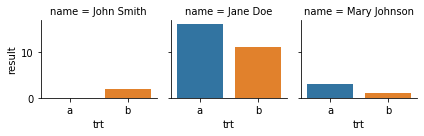

In [248]:
#import seaborn data
import seaborn as sns

sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy2, height=2);

In [0]:
flights = sns.load_dataset('flights')

In [249]:
# Flights Pivot Table
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[12, np.NaN],
     ['January',    112], 
     ['February',      432]],
    index=[1900, 1949, 1960], 
    columns=['month', 'passengers'])

In [50]:
table1

,month,passengers
1900,12,NaN
1949,January,112.0
1960,February,432.0


In [51]:
table2 = table1.T
table2

,1900,1949,1960
month,12,January,February
passengers,NaN,112,432


In [52]:
table1 = table1.reset_index()
table1

,index,month,passengers
0,1900,12,NaN
1,1949,January,112.0
2,1960,February,432.0


In [53]:
tidy2 = table1.melt(id_vars='index', value_vars=['month', 'passengers'])
tidy2

,index,variable,value
0,1900,month,12
1,1949,month,January
2,1960,month,February
3,1900,passengers,NaN
4,1949,passengers,112
5,1960,passengers,432


In [54]:
#Renaming Columns
tidy2 = tidy2.rename(columns={
    'index': 'year', 
    'variable': 'month', 
    'value': 'passengers'
})
tidy2

,year,month,passengers
0,1900,month,12
1,1949,month,January
2,1960,month,February
3,1900,passengers,NaN
4,1949,passengers,112
5,1960,passengers,432


In [55]:
wide = tidy2.pivot_table(index='passengers', columns='month', values='year')
wide

month,month,passengers
passengers,,
12,1900.0,NaN
112.0,NaN,1949.0
432.0,NaN,1960.0
February,1960.0,NaN
January,1949.0,NaN


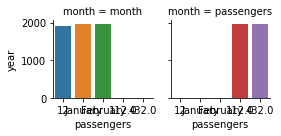

In [56]:
#Seaborn Function Graph
import seaborn as sns

sns.catplot(x='passengers', y='year', col='month', 
            kind='bar', data=tidy2, height=2);

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

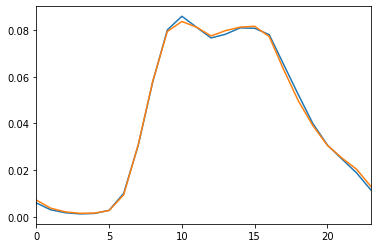

In [58]:
(yellow['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(few['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())


TypeError: ignored

In [0]:
few = subset[subset['product_name']=='Bag of Organic Bananas']
red = subset[subset['product_name']=='Organic Strawberries']
green = subset[subset['product_name']=='Organic Baby Spinach']
navy = subset[subset['product_name']=='Organic Avocado']
neon = subset[subset['product_name']=='Large Lemon']
mix = subset[subset['product_name']=='Strawberries']
sour = subset[subset['product_name']=='Limes']
white = subset[subset['product_name']=='Organic Whole Milk']      

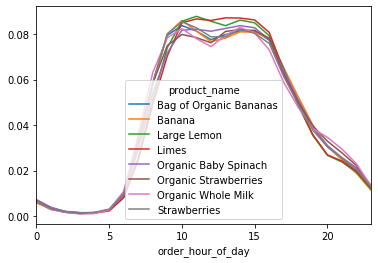

In [41]:
pd.crosstab(subset['order_hour_of_day'], 
            subset['product_name'], 
            normalize='columns').plot()

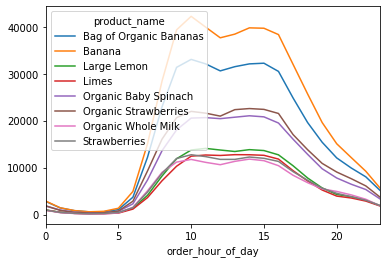

In [42]:
#SubsetPivot
subset.pivot_table(index='order_hour_of_day', 
                   columns='product_name', 
                   values='order_id', 
                   aggfunc=len).plot()

In [43]:
#Melt
wide = pd.crosstab(subset['order_hour_of_day'], 
                    subset['product_name'], 
                    normalize=True)

wide

product_name,Bag of Organic Bananas,Banana,Large Lemon,Limes,Organic Baby Spinach,Organic Strawberries,Organic Whole Milk,Strawberries
order_hour_of_day,,,,,,,,
0,0.001409,0.001448,0.000510,0.000483,0.000913,0.000942,0.000468,0.000482
1,0.000718,0.000729,0.000250,0.000248,0.000498,0.000451,0.000210,0.000239
2,0.000417,0.000431,0.000159,0.000133,0.000256,0.000240,0.000122,0.000139
3,0.000298,0.000304,0.000119,0.000095,0.000201,0.000171,0.000070,0.000093
4,0.000312,0.000354,0.000128,0.000108,0.000197,0.000196,0.000082,0.000125
5,0.000530,0.000680,0.000223,0.000166,0.000352,0.000382,0.000191,0.000232
6,0.001847,0.002455,0.000670,0.000591,0.001146,0.001423,0.000778,0.000740
7,0.006057,0.007481,0.002040,0.001801,0.003660,0.004615,0.002520,0.002376
8,0.011407,0.014129,0.004091,0.003586,0.006761,0.007989,0.004478,0.004369


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####